# Prospective Customer Prediction

#### Problem Statement :-

##### A leading bank has planned to promote a newly launched product by a marketing campaign. To maximize the profit of the campaign and to ensure the campaign reach the potential customers, the customer demographic and behavioural data need be considered while planning the strategy. Build a model to predict prospective customers for a marketing campaign based on their purchase behaviour and responses to previous campaigns.


#### Objectives :-

###### 1. Perform Data Analysis to derive insights on the data
###### 2. Build models using Hyperparameter Tuning
###### 3. Evaluate the model
###### 4. Deploy models using Web Interface/Dashboard
**********************************************************************************************************************

### Data Description
#### Dependent Variables are :-
##### Bank client data:
###### age: age of the consumer 
###### job: type of job 
###### marital: marital status
###### education: education qualification of consumer
###### default: consumer has credit in default or not
###### housing: consumer has housing loan or not
###### loan: consumer has personal loan or not

##### Related with the last contact of the current campaign
###### contact: contact communication type
###### month: last contact month of year
###### day: last contact day of the week 
###### duration: last contact duration, in seconds
###### campaign: number of contacts performed during this campaign and for this client 
###### pdays: number of days that passed by after the client was last contacted from a previous campaign 
###### previous: number of contacts performed before this campaign and for this client 
###### poutcome: outcome of the previous marketing campaign 
###### Employment variation ratethe employment-to-population ratio)
###### Consumer Price Index: (a measure of the aggregate price level in an economy
###### Consumer confidence index: how optimistic or pessimistic consumers are regarding their expected financial situation
###### 3 Months Euribor rate -the average interest rate at which a selection of banks provide one another with short-term loans in euros
###### 20 - number of employees in the bank
#### Independent Variables are :-
###### Term Deposit:  has the client subscribed a term deposit or not(Product / Target variable) 

******************************************************************************************************************
#### Summary of the code

* Data Cleaning

##### Numerical Analysis
* Exploratory Data Analysis- Checking Skewness/Correlatin/Kurtosis
* Exploratory Data Analysis- Visulization
* Preprocessing - Data cleaning (missing, outliers)
* Preprocessing - Data Transformation(normalization)

##### Categorical Analysis
* Exploratory Data Analysis- Visulization
* Preprocessing - Data cleaning (missing, encoding)
* Preprocessing - Data Transformation(normalization)

* Feature Selection, Creation, Removal
* Dataset is divided into train-test in ratio 4:1. 
* Model Building intial model built validated the performnace across metrics across models then transformed if accuracy and variance is not good enough
* Once model is fixed grid serach and cross validation technique to find the best parameters
* Pick the model for future use
* During intial model building ,many models were not performing much only Random Forest and Logistic Regression did a decent jobs with the given data, Given the approch of model selection was of 5-3-2-1.
* Just analysed the accuracy and ROC curve accross the data and choose the Random forest/Logistic Regression for futher processs
* Grid search(Hyperparameter tuning) was carried to Random Forest Classifier for getting parameters and scores were validate (91% Accuracy and 0.73 AUC ROC Score i.e. >Logistic Regression with final parameters)

Thanks and Regards

### Importing Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,8
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn import tree
from sklearn import neighbors 
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, confusion_matrix, classification_report,roc_auc_score,roc_curve

### Importing Dataset

In [3]:
# Read data
cust_data = pd.read_csv("Predict potential customer -case_study.csv")

# Lowercase the column names
cust_data.columns = [x.lower() for x in cust_data.columns]
cust_data.columns = cust_data.columns.str.replace(' ','_')

cust_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,3_months_euribor_rate,number_of_employees_in_the_bank,term_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
cust_data.loc[cust_data['education']=="basic.9y","education"]="basic.school"
cust_data.loc[cust_data['education']=="basic.4y","education"]="basic.school"
cust_data.loc[cust_data['education']=="basic.6y","education"]="basic.school"

##### We observed that 999 was most occuringin the pdays column which talked about number of days passed after made a contact to the customer in the previous campaign. So we created a new categorical column called" "prev_c" that implies whether if the customer was contacted in the previous campaign or not. So to achieve thta we converted all the fields with 999 as "no" and others as "yes".

In [5]:
cust_data['prev_c']=cust_data['pdays']
cust_data.loc[cust_data['prev_c']==999,"prev_c"]="no"
cust_data.loc[cust_data['prev_c']!="no","prev_c"]="yes"
cust_data.prev_c.value_counts()

no     39673
yes     1515
Name: prev_c, dtype: int64

In [6]:
cust_data=cust_data.drop(columns='pdays',axis=1)

### Exploratory data analysis (EDA) 

###### We have made our data loads and now we are ready to do some data exploration and come up with some inference. The goal for the EDA is to get some insight and if any irregularities are found we will correct that in the next section, Data Pre-Processing.

In [7]:
print("Total rows : ",cust_data.shape[0])
cust_data.info()

Total rows :  41188
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              41188 non-null  int64  
 1   job                              41188 non-null  object 
 2   marital                          41188 non-null  object 
 3   education                        41188 non-null  object 
 4   default                          41188 non-null  object 
 5   housing                          41188 non-null  object 
 6   loan                             41188 non-null  object 
 7   contact                          41188 non-null  object 
 8   month                            41188 non-null  object 
 9   day_of_week                      41188 non-null  object 
 10  duration                         41188 non-null  int64  
 11  campaign                         41188 non-null  int64  
 12

In [8]:
# Checking duplicate rows
cust_data.duplicated().sum()

15

In [9]:
# dropping duplicate rows
cust_data=cust_data.drop_duplicates(subset=None, keep='first', inplace=False)
print("Present rows : ",cust_data.shape[0])

Present rows :  41173


In [10]:
cust_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', '3_months_euribor_rate',
       'number_of_employees_in_the_bank', 'term_deposit', 'prev_c'],
      dtype='object')

###### Describing the dataset and checking if something looks odd. Note describe works only for continous variables and for categorical values we have to use diiferent techniques to describe data

In [11]:
# Summary of data
cust_data.describe()

,age,duration,campaign,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,3_months_euribor_rate,number_of_employees_in_the_bank
count,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000
mean,40.023462,258.320671,2.567969,0.173002,0.082059,93.575770,-40.502448,3.621463,5167.039820
std,10.420951,259.312867,2.770396,0.494964,1.570858,0.578831,4.627773,1.734387,72.251669
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


##### We will consider "term_deposit" as our target variable as it is the result of customer marketing analysis if a customer has bought the bank's services or not.

#### Numerical EDA
###### taking numerial variables(9) into consideration perform EDA seperately for better understanding of Data

In [12]:
# taking all numerical data
numerical_values = cust_data[['age','duration','campaign','previous','employment_variation_rate','consumer_price_index'
                              ,'consumer_confidence_index','3_months_euribor_rate','number_of_employees_in_the_bank','term_deposit']]

In [13]:
# convert term deposit to numerical data
numerical_values=numerical_values.replace(["yes","no"],[1,0])

In [14]:
numerical_values.head()

,age,duration,campaign,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,3_months_euribor_rate,number_of_employees_in_the_bank,term_deposit
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0


In [15]:
numerical_values['number_of_employees_in_the_bank'].value_counts()

5228.1    16228
5099.1     8529
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: number_of_employees_in_the_bank, dtype: int64

In [16]:
numerical_values['term_deposit'].value_counts()

0    36534
1     4639
Name: term_deposit, dtype: int64

#### Taking term deposit as target variable Let's do 'Univariate' analysis
###### Distribution of Target variable From the below graph we could see our target is not normalized it is positive skewed and skewed towards right side so we need to normalize it we before we run model on it

In [17]:
numerical_values=numerical_values.astype({"term_deposit":'int64'})
numerical_values.dtypes

age                                  int64
duration                             int64
campaign                             int64
previous                             int64
employment_variation_rate          float64
consumer_price_index               float64
consumer_confidence_index          float64
3_months_euribor_rate              float64
number_of_employees_in_the_bank    float64
term_deposit                         int64
dtype: object

Skew is: 0.7846373874672642
Kurtosis: 0.791084
Skew is: 3.2627119605719987
Kurtosis: 20.242510
Skew is: 4.761900625383871
Kurtosis: 36.969647
Skew is: 3.8316393123087376
Kurtosis: 20.104059
Skew is: -0.7242843997849419
Kurtosis: -1.062331
Skew is: -0.23101786890644577
Kurtosis: -0.829631
Skew is: 0.3027819815890234
Kurtosis: -0.358982
Skew is: -0.7094251963726943
Kurtosis: -1.406448
Skew is: -1.044524898167548
Kurtosis: -0.003143
Skew is: 2.4500651365650783
Kurtosis: 4.003014


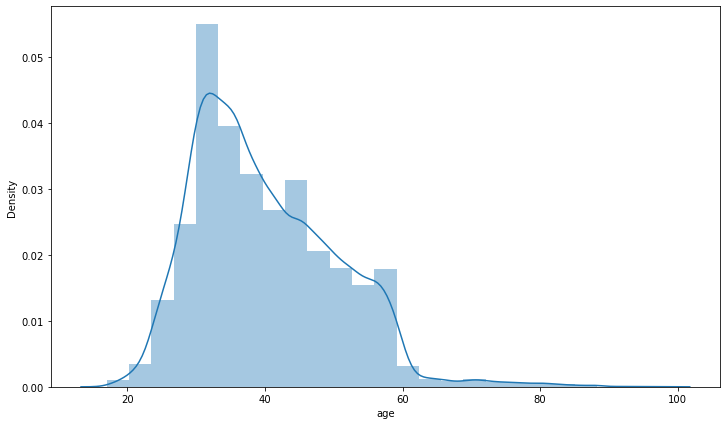

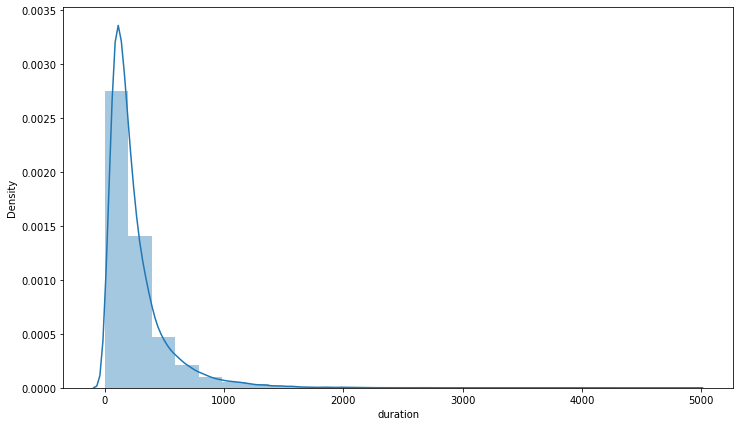

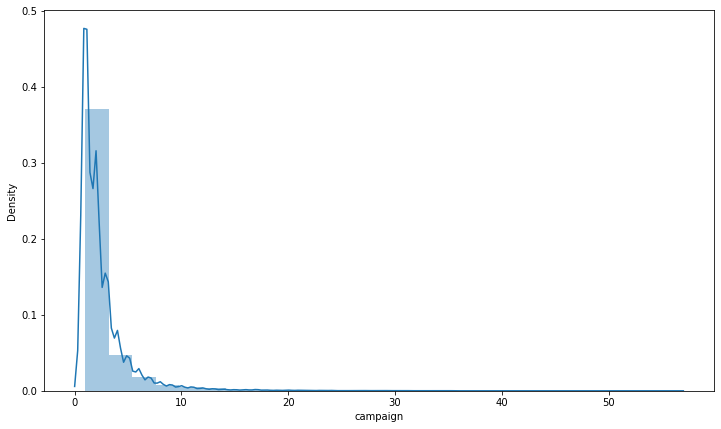

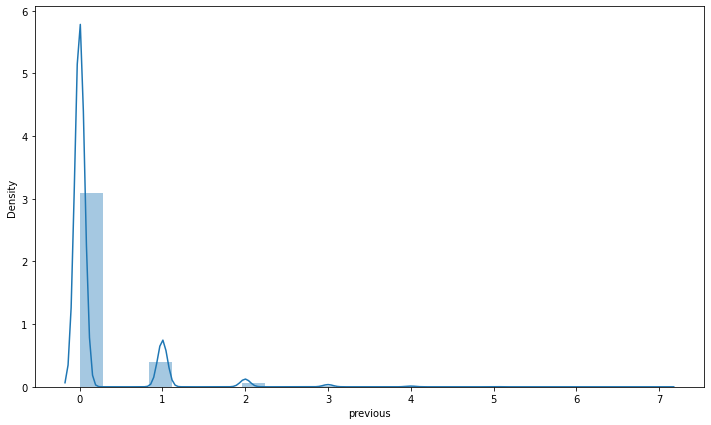

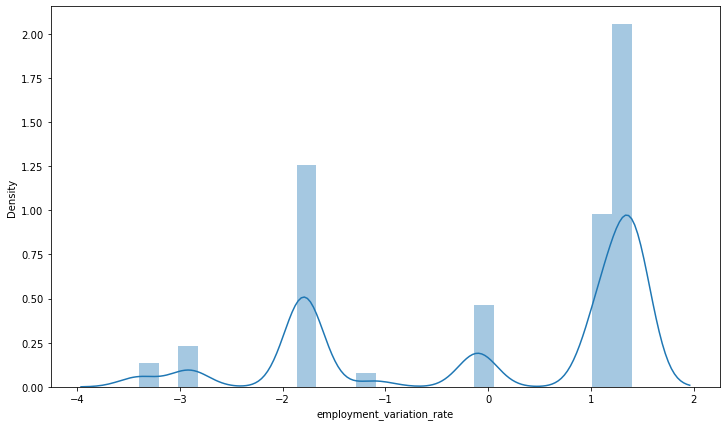

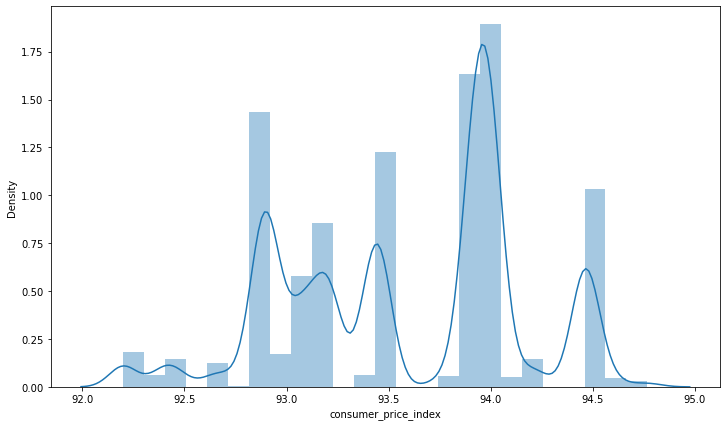

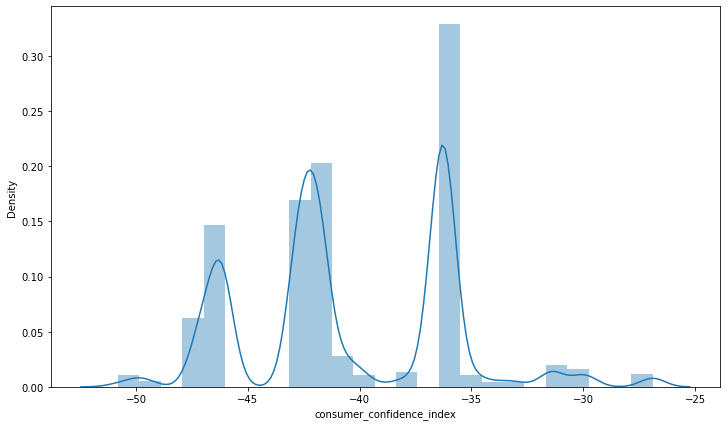

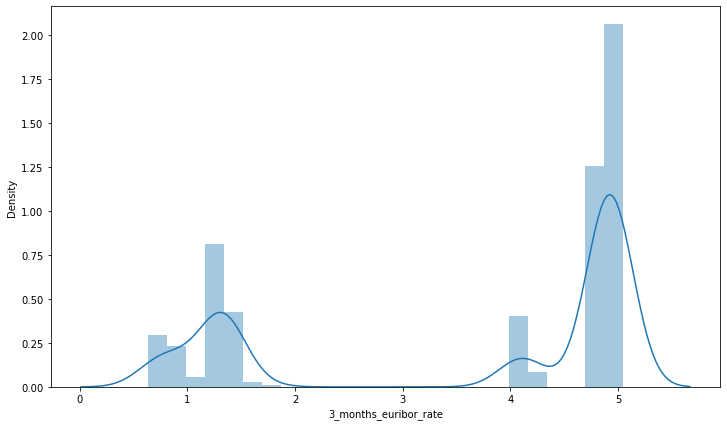

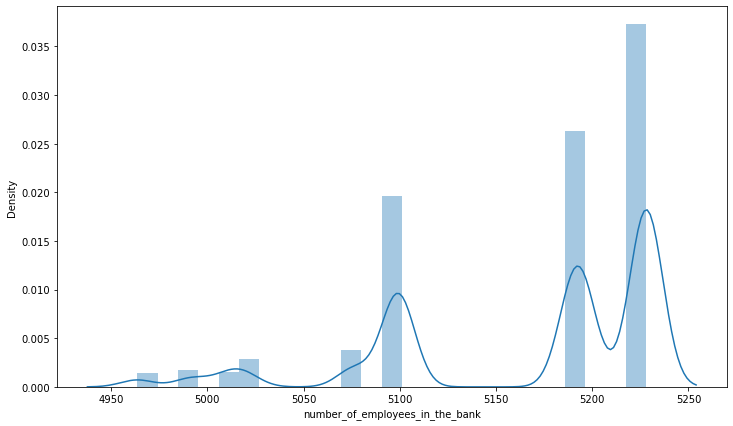

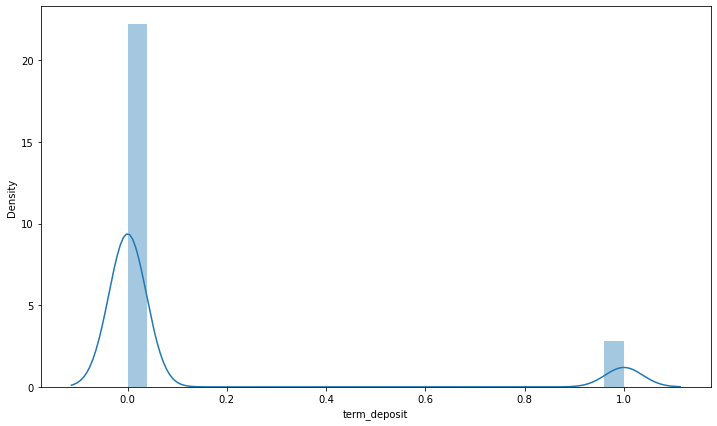

In [18]:
for i in numerical_values:
    plt.figure(figsize=(12,7))
    sns.distplot(numerical_values[i], bins = 25)
    print ("Skew is:", numerical_values[i].skew())
    print("Kurtosis: %f" % numerical_values[i].kurt())


##### Correlation between Numerical Predictors and Target variable
##### Correlation between depedent variables is not a big concern as there is not much correlation between lets see how the dependent variables are correlated with Target Variable

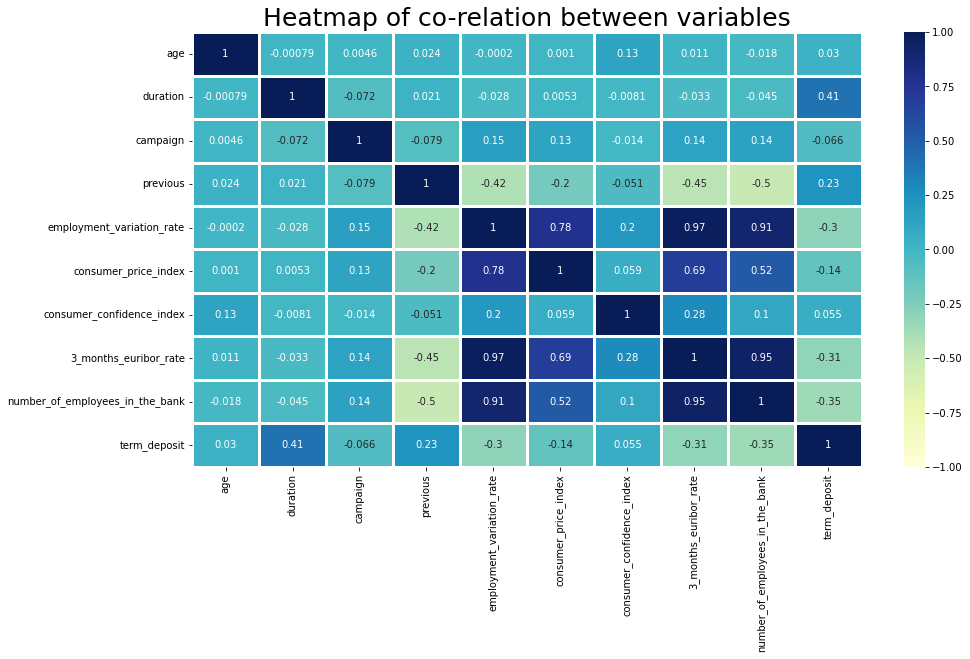

<Figure size 1080x576 with 0 Axes>

In [19]:
sns.heatmap(numerical_values.corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1,linewidths=3)
plt.title('Heatmap of co-relation between variables',fontsize=25)
plt.show()
plt.savefig('heatmap')

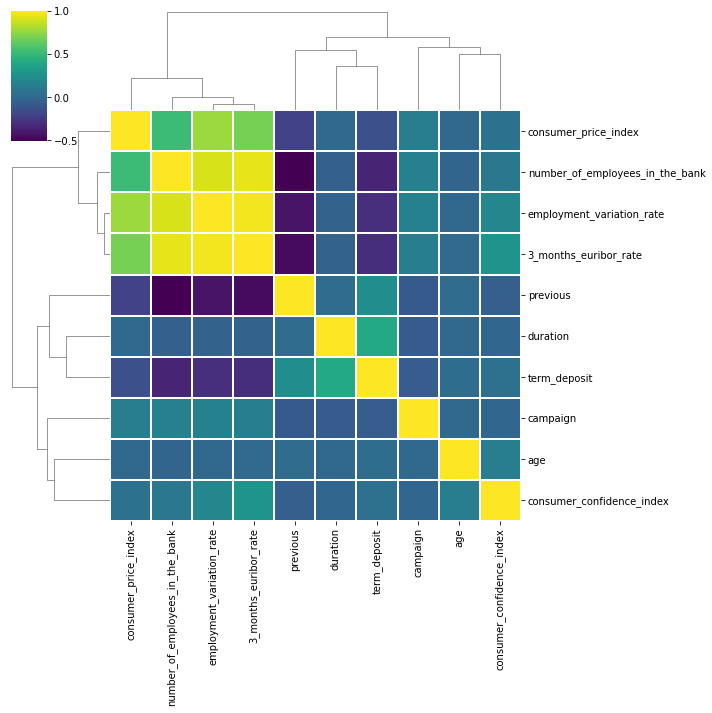

In [20]:
corrmat = numerical_values.corr()
cg = sns.clustermap(corrmat,cmap='viridis',linewidth=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation=0)
cg

<AxesSubplot:xlabel='job', ylabel='3_months_euribor_rate'>

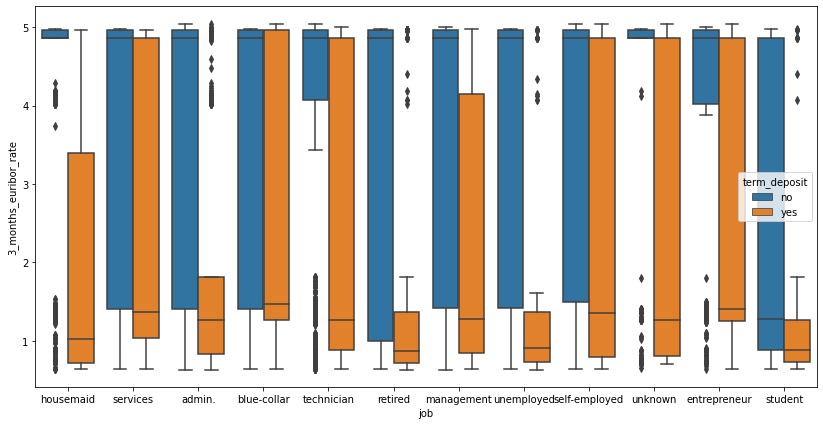

In [21]:
plt.figure(figsize=[14,7])
sns.boxplot(x='job',y='3_months_euribor_rate',data=cust_data,hue='term_deposit')

###### Plotting boxplot/graphs to see outliers in data.

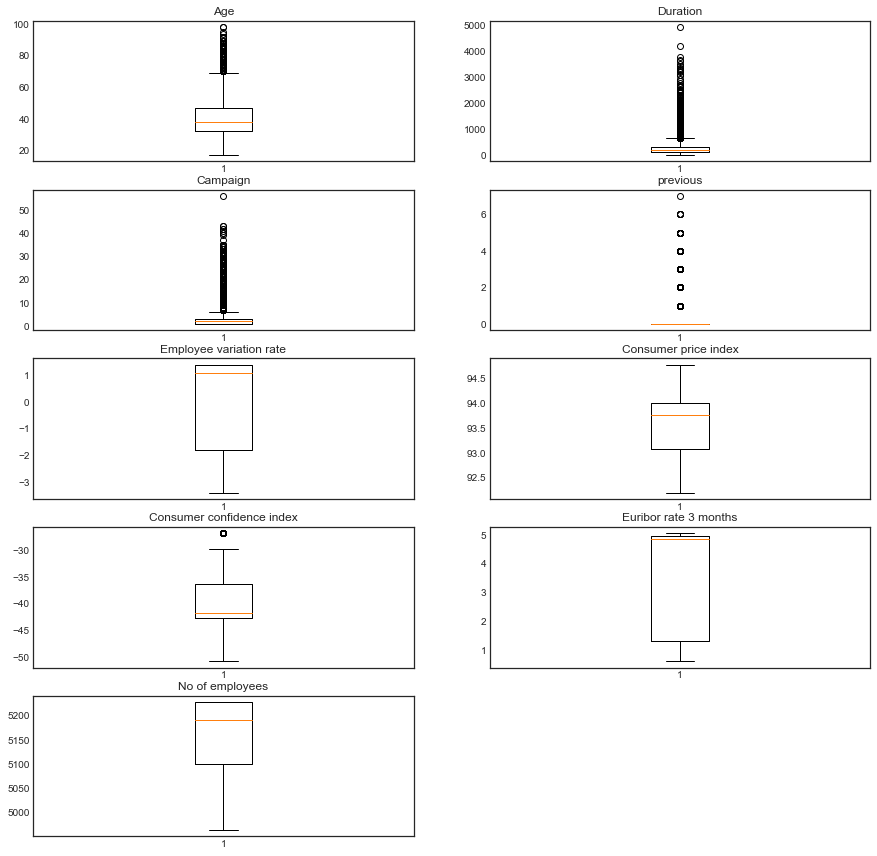

In [22]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
ax=plt.subplot(5,2,1)
plt.boxplot(cust_data['age'])
ax.set_title('Age')
ax=plt.subplot(5,2,2)
plt.boxplot(cust_data['duration'])
ax.set_title('Duration')
ax=plt.subplot(5,2,3)
plt.boxplot(cust_data['campaign'])
ax.set_title('Campaign')
ax=plt.subplot(5,2,4)
plt.boxplot(cust_data['previous'])
ax.set_title('previous')
ax=plt.subplot(5,2,5)
plt.boxplot(cust_data['employment_variation_rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(5,2,6)
plt.boxplot(cust_data['consumer_price_index'])
ax.set_title('Consumer price index')
ax=plt.subplot(5,2,7)
plt.boxplot(cust_data['consumer_confidence_index'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(5,2,8)
plt.boxplot(cust_data['3_months_euribor_rate'])
ax.set_title('Euribor rate 3 months')
ax=plt.subplot(5,2,9)
plt.boxplot(cust_data['number_of_employees_in_the_bank'])
ax.set_title('No of employees')
plt.savefig('outliers')

<AxesSubplot:xlabel='loan', ylabel='employment_variation_rate'>

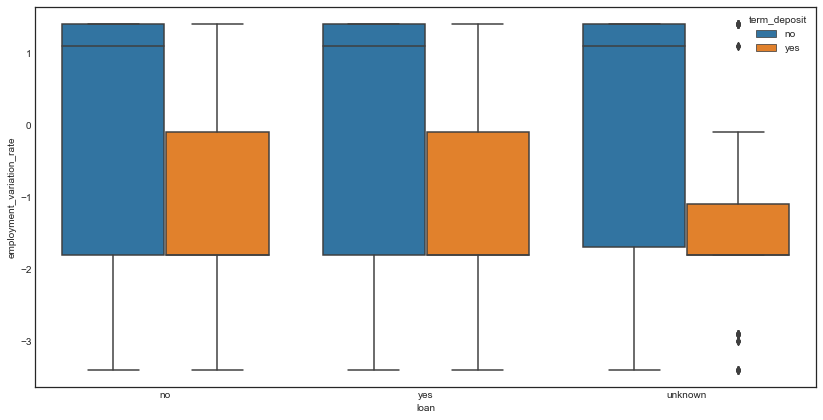

In [23]:
plt.figure(figsize=[14,7])
sns.boxplot(x='loan',y='employment_variation_rate',data=cust_data,hue='term_deposit')

In [24]:
numerical_values.isna().sum()

age                                0
duration                           0
campaign                           0
previous                           0
employment_variation_rate          0
consumer_price_index               0
consumer_confidence_index          0
3_months_euribor_rate              0
number_of_employees_in_the_bank    0
term_deposit                       0
dtype: int64

In [25]:
numerical_values.shape

(41173, 10)

#### Categorical EDA
###### taking categorical variables (12) into consideration perform EDA seperately for better understanding of Data

In [26]:
d_cat = cust_data.select_dtypes(include = 'object').copy()

In [27]:
d_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,term_deposit,prev_c
0,housemaid,married,basic.school,no,no,no,telephone,may,mon,nonexistent,no,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no,no
3,admin.,married,basic.school,no,no,no,telephone,may,mon,nonexistent,no,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no,no


In [28]:
d_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'term_deposit', 'prev_c'],
      dtype='object')

In [29]:
print(d_cat.job.value_counts())
print(125*"-")
print(d_cat.marital.value_counts())
print(125*"-")
print(d_cat.education.value_counts())
print(125*"-")
print(d_cat.default.value_counts())
print(125*"-")
print(d_cat.housing.value_counts())
print(125*"-")
print(d_cat.loan.value_counts())
print(125*"-")
print(d_cat.contact.value_counts())
print(125*"-")
print(d_cat.month.value_counts())
print(125*"-")
print(d_cat.day_of_week.value_counts())
print(125*"-")
print(d_cat.poutcome.value_counts())
print(125*"-")
print(d_cat.term_deposit.value_counts())
print(125*"-")
print(d_cat.prev_c.value_counts())

admin.           10419
blue-collar       9250
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
married     24918
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
basic.school           12509
university.degree      12164
high.school             9512
professional.course     5240
unknown                 1730
illiterate                18
Name: education, dtype: int64
-----------------------------------------------------------------------------------------------------------------------------
no         32574
u

<AxesSubplot:xlabel='job', ylabel='duration'>

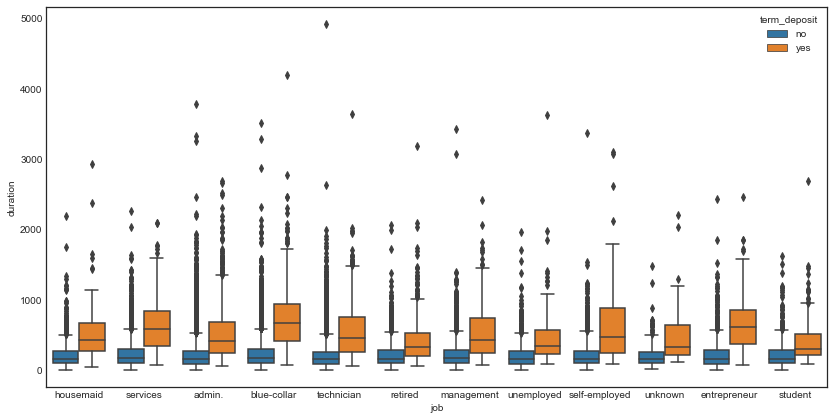

In [30]:
plt.figure(figsize=[14,7])
sns.boxplot(x='job',y='duration',data=cust_data,hue='term_deposit')

<AxesSubplot:xlabel='Number of calls', ylabel='duration'>

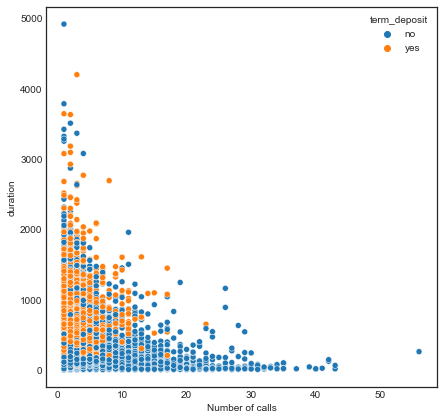

In [31]:
plt.figure(figsize=[7,7])
plt.xlabel('Number of calls')
sns.scatterplot(x='campaign',y='duration',data=cust_data,hue='term_deposit')

In [32]:
d1 = pd.crosstab(index = d_cat["job"],columns="count")    
d2 = pd.crosstab(index = d_cat["marital"],columns="count")  
d3= pd.crosstab(index = d_cat["education"],columns="count") 
d4=pd.crosstab(index = d_cat["default"],columns="count")
d5 = pd.crosstab(index = d_cat["housing"],columns="count")    
d6 = pd.crosstab(index = d_cat["loan"],columns="count")  
d7= pd.crosstab(index = d_cat["contact"],columns="count") 
d8=pd.crosstab(index = d_cat["month"],columns="count")
d9= pd.crosstab(index = d_cat["day_of_week"],columns="count") 
d10=pd.crosstab(index = d_cat["poutcome"],columns="count")
d11=pd.crosstab(index=d_cat['prev_c'],columns='count')

In [33]:
d_yes = cust_data[cust_data['term_deposit']=='yes'].select_dtypes(include = 'object').copy()
d_yes.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,term_deposit,prev_c
75,blue-collar,divorced,basic.school,unknown,yes,no,telephone,may,mon,nonexistent,yes,no
83,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,nonexistent,yes,no
88,technician,married,basic.school,no,no,no,telephone,may,mon,nonexistent,yes,no
129,technician,married,professional.course,unknown,yes,no,telephone,may,mon,nonexistent,yes,no
139,blue-collar,married,basic.school,unknown,yes,no,telephone,may,mon,nonexistent,yes,no


In [34]:
df1 = pd.crosstab(index = d_yes["job"],columns="count")    
df2 = pd.crosstab(index = d_yes["marital"],columns="count")  
df3= pd.crosstab(index = d_yes["education"],columns="count") 
df4=pd.crosstab(index = d_yes["default"],columns="count")
df5 = pd.crosstab(index = d_yes["housing"],columns="count")    
df6 = pd.crosstab(index = d_yes["loan"],columns="count")  
df7= pd.crosstab(index = d_yes["contact"],columns="count") 
df8=pd.crosstab(index = d_yes["month"],columns="count")
df9= pd.crosstab(index = d_yes["day_of_week"],columns="count") 
df10=pd.crosstab(index = d_yes["poutcome"],columns="count")
df11=pd.crosstab(index=d_yes['prev_c'],columns='count')

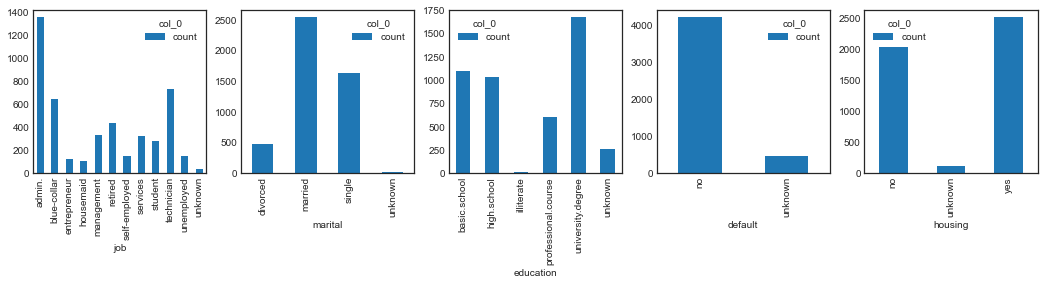

In [35]:
fig,axes = plt.subplots(nrows=1, ncols=5,figsize=[18,3])
df1.plot.bar(ax=axes[0])
df2.plot.bar(ax=axes[1])
df3.plot.bar(ax=axes[2])
df4.plot.bar(ax=axes[3])
df5.plot.bar(ax=axes[4])
plt.savefig('CatvsTerm')

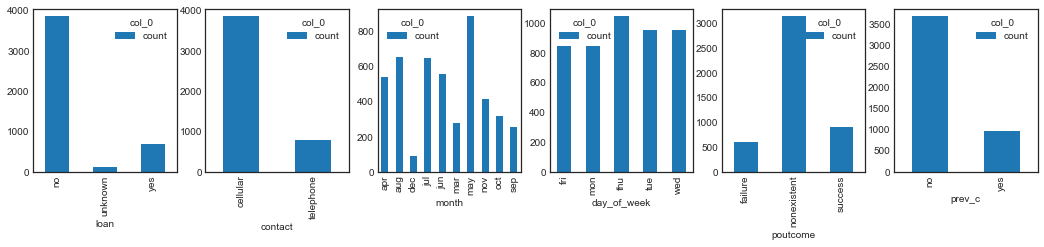

In [36]:
fig,axes = plt.subplots(nrows=1, ncols=6,figsize=[18,3])
df6.plot.bar(ax=axes[0])
df7.plot.bar(ax=axes[1])
df8.plot.bar(ax=axes[2])
df9.plot.bar(ax=axes[3])
df10.plot.bar(ax=axes[4])
df11.plot.bar(ax=axes[5])
plt.savefig('CatvsTerm1')

In [37]:
d_cat.isna().sum()

job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
poutcome        0
term_deposit    0
prev_c          0
dtype: int64

In [38]:
d_cat.shape

(41173, 12)

#### prev_c is a derieved column to group all data in previous other than 0 as yes and 0 as no as it is treated as categorical data

### Data Pre-Processing

###### We will utilize the insights from EDA into data pre-processing
###### From analysis we found that there are 41176 rows and 11 attributes with no NULL values

#### Checking missing data

In [39]:
def missing(x):
  missing_values_number=x.isnull().sum()
  missing_values_percentage=x.isnull().sum()/x.shape[0]*100 
  return missing_values_number,missing_values_percentage

In [40]:
missing(cust_data)

(age                                0
 job                                0
 marital                            0
 education                          0
 default                            0
 housing                            0
 loan                               0
 contact                            0
 month                              0
 day_of_week                        0
 duration                           0
 campaign                           0
 previous                           0
 poutcome                           0
 employment_variation_rate          0
 consumer_price_index               0
 consumer_confidence_index          0
 3_months_euribor_rate              0
 number_of_employees_in_the_bank    0
 term_deposit                       0
 prev_c                             0
 dtype: int64,
 age                                0.0
 job                                0.0
 marital                            0.0
 education                          0.0
 default                   

#### Detecting outliers
###### For detecting outliers Z-Score method is used.
##### Z-Score: 
###### This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

##### Z score = (x -mean) / std. deviation


In [41]:
def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    outliers=[]
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [42]:
def print_outliers(data_1):
    outlier_datapoints = detect_outlier(data_1)
    print("Count of outliers : ",len(outlier_datapoints))
    unique_data=set(outlier_datapoints)
    print("outlier data : ",unique_data)
    cust_data.drop

In [43]:
print_outliers(cust_data["campaign"])
print('-'*125)
print_outliers(cust_data["age"])
print('-'*125)
print_outliers(cust_data["duration"])
print('-'*125)
print_outliers(cust_data["previous"])
print('-'*125)
print_outliers(cust_data["employment_variation_rate"])
print('-'*125)
print_outliers(cust_data["consumer_confidence_index"])
print('-'*125)
print_outliers(cust_data["consumer_price_index"])
print('-'*125)
print_outliers(cust_data["3_months_euribor_rate"])
print('-'*125)
print_outliers(cust_data["number_of_employees_in_the_bank"])

Count of outliers :  869
outlier data :  {11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 56}
-----------------------------------------------------------------------------------------------------------------------------
Count of outliers :  369
outlier data :  {72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 94, 95, 98}
-----------------------------------------------------------------------------------------------------------------------------
Count of outliers :  861
outlier data :  {2053, 2055, 2062, 2078, 2087, 2089, 2093, 2122, 2129, 2139, 4199, 2184, 2187, 2191, 2203, 2219, 2231, 2260, 2299, 2301, 2316, 2372, 2420, 2429, 2453, 2456, 2462, 2486, 2516, 2621, 2635, 2653, 2680, 2692, 2769, 4918, 2870, 2926, 3076, 3078, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 3094, 1047, 1046, 1049, 1048, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 

#### Removing Outliers

###### From above we get to know the some field like- campaign, age, duration, pdays and previous have a noticable amount of outliers. Hence we have to remove it.
###### For removing outliers we are using the InterQuartile Range method
##### InterQuartile Range(IQR) :
###### The interquartile range, often abbreviated IQR, is the difference between the 25th percentile (Q1) and the 75th percentile (Q3) in a dataset. It measures the spread of the middle 50% of values.
###### One popular method is to declare an observation to be an outlier if it has a value 1.5 times greater than the IQR or 1.5 times less than the IQR.

In [44]:
cols=['age','duration','campaign']
Quar=[]
for i in cols:
    Q3=np.quantile(cust_data[i],0.75)
    Q1=np.quantile(cust_data[i],0.25)
    IQR=Q3-Q1
    x=Q3+(1.5*IQR)
    Quar.append(x)
Quar

[69.5, 644.5, 6.0]

In [45]:
cust_data.loc[cust_data['age']>69.5,"age"]=69.5
cust_data.loc[cust_data['duration']>644.5,"duration"]=644.5
cust_data.loc[cust_data['campaign']>6.0,"campaign"]=6.0

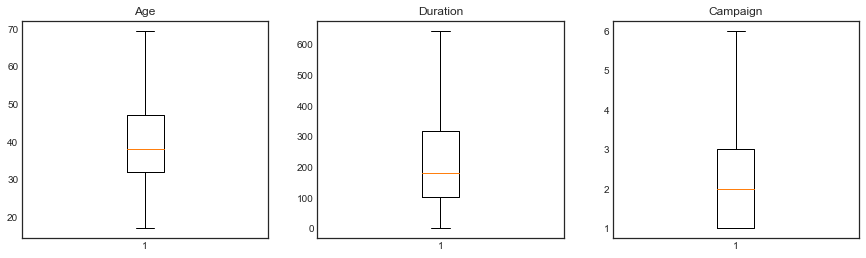

In [46]:
plt.figure(figsize = (15, 4))
plt.style.use('seaborn-white')
ax=plt.subplot(1,3,1)
plt.boxplot(cust_data['age'])
ax.set_title('Age')
ax=plt.subplot(1,3,2)
plt.boxplot(cust_data['duration'])
ax.set_title('Duration')
ax=plt.subplot(1,3,3)
plt.boxplot(cust_data['campaign'])
ax.set_title('Campaign')
plt.savefig('removed outliers')

#### Encoding
###### Encoding is a technique of converting categorical variables into numerical values so that it could be easily fitted to a machine learning model. Two types of encoding techniques are used : 
##### 1- One Hot Encoding:
###### One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column(dummies) and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1
##### 2- Find and Replace:
###### In fields like month, day_of_week we replaced the categorical values with known numerical values for modelling 

In [47]:
cust_data.loc[cust_data['job']=='unknown','job']='unknownj'
cust_data.loc[cust_data['education']=='unknown','education']='unknowne'
cust_data.loc[cust_data['marital']=='unknown','marital']='unknownm'

In [48]:
month_d={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
cust_data['month']= cust_data['month'].map(month_d) 

In [49]:
day_d={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
cust_data['day_of_week']= cust_data['day_of_week'].map(day_d) 

In [50]:
dict1={'yes':1,'no':0,'unknown':-1}
cust_data['default']=cust_data['default'].map(dict1)
cust_data['housing']=cust_data['housing'].map(dict1)
cust_data['loan']=cust_data['loan'].map(dict1)

In [51]:
dict2={'no':0,'yes':1}
cust_data['term_deposit']=cust_data['term_deposit'].map(dict2)
cust_data['prev_c']=cust_data['prev_c'].map(dict2)

In [52]:
d_contact=pd.get_dummies(cust_data['contact'], prefix='d',drop_first=True)
d_outcome=pd.get_dummies(cust_data['poutcome'], prefix='d',drop_first=True)
d_job=pd.get_dummies(cust_data['job'], prefix='d',drop_first=True)
d_education=pd.get_dummies(cust_data['education'], prefix='d',drop_first=True)
d_marital=pd.get_dummies(cust_data['marital'], prefix='d',drop_first=True)
cust_data = pd.concat([cust_data,d_contact,d_outcome,d_job,d_education,d_marital],axis=1)
cust_data.drop(['contact','poutcome','job','education','marital'],axis=1, inplace=True)

In [53]:
cust_data.columns

Index(['age', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration',
       'campaign', 'previous', 'employment_variation_rate',
       'consumer_price_index', 'consumer_confidence_index',
       '3_months_euribor_rate', 'number_of_employees_in_the_bank',
       'term_deposit', 'prev_c', 'd_telephone', 'd_nonexistent', 'd_success',
       'd_blue-collar', 'd_entrepreneur', 'd_housemaid', 'd_management',
       'd_retired', 'd_self-employed', 'd_services', 'd_student',
       'd_technician', 'd_unemployed', 'd_unknownj', 'd_high.school',
       'd_illiterate', 'd_professional.course', 'd_university.degree',
       'd_unknowne', 'd_married', 'd_single', 'd_unknownm'],
      dtype='object')

#### Standardization of numerical variables
###### Feature scaling is one of the most important data preprocessing step in machine learning. Algorithms that compute the distance between the features are biased towards numerically larger values if the data is not scaled

In [54]:
cust_data_scale=cust_data.copy()
Categorical_variables=['d_blue-collar','d_self-employed','d_entrepreneur','d_housemaid','d_management','d_retired','d_services',
                       'd_student','d_technician','d_unemployed','d_unknownj','d_high.school','d_illiterate',
                       'd_professional.course','d_university.degree','d_unknowne','d_married','d_single','d_unknownm','default',
                       'housing', 'loan', 'month', 'day_of_week','term_deposit', 'd_telephone', 'd_nonexistent', 'd_success',
                       'prev_c']

In [55]:
feature_scale=[feature for feature in cust_data_scale.columns if feature not in Categorical_variables]

In [56]:
scaler=StandardScaler()
scaler.fit(cust_data_scale[feature_scale])

StandardScaler()

In [57]:
scaled_data = pd.concat([cust_data_scale[['d_blue-collar','d_self-employed','d_entrepreneur','d_housemaid','d_management',
                                          'd_retired','d_services','d_student','d_technician','d_unemployed','d_unknownj',
                                          'd_high.school','d_illiterate','d_professional.course','d_university.degree',
                                          'd_unknowne','d_married','d_single','d_unknownm','default', 'housing',
                                          'loan', 'month', 'day_of_week','term_deposit', 'd_telephone','d_nonexistent',
                                          'd_success', 'prev_c']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(cust_data_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

,d_blue-collar,d_self-employed,d_entrepreneur,d_housemaid,d_management,d_retired,d_services,d_student,d_technician,d_unemployed,...,prev_c,age,duration,campaign,previous,employment_variation_rate,consumer_price_index,consumer_confidence_index,3_months_euribor_rate,number_of_employees_in_the_bank
0,0,0,0,1,0,0,0,0,0,0,...,0,1.585666,0.146450,-0.822604,-0.349528,0.648024,0.722552,0.886495,0.712386,0.331625
1,0,0,0,0,0,0,1,0,0,0,...,0,1.684393,-0.485007,-0.822604,-0.349528,0.648024,0.722552,0.886495,0.712386,0.331625
2,0,0,0,0,0,0,1,0,0,0,...,0,-0.290148,-0.050880,-0.822604,-0.349528,0.648024,0.722552,0.886495,0.712386,0.331625
3,0,0,0,0,0,0,0,0,0,0,...,0,0.006033,-0.473731,-0.822604,-0.349528,0.648024,0.722552,0.886495,0.712386,0.331625
4,0,0,0,0,0,0,1,0,0,0,...,0,1.585666,0.405798,-0.822604,-0.349528,0.648024,0.722552,0.886495,0.712386,0.331625


#### Feature Selection


###### Feature selection is a way of selecting the subset of the most relevant features from the original features set by removing the redundant, irrelevant, or noisy features

In [58]:
X=scaled_data.drop(['term_deposit'],axis=1)
y=scaled_data.term_deposit

In [59]:
imp=mutual_info_classif(X,y)

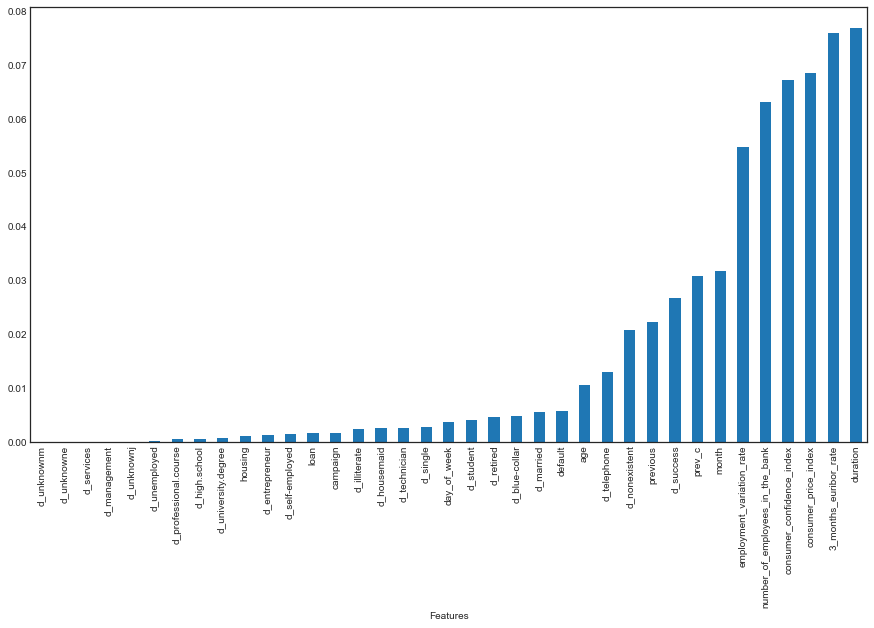

In [60]:
pd.Series(imp,index=X.columns).sort_values().plot.bar()
plt.xlabel('Features')
plt.savefig('Feature Selection')

##### From the above we found that the target variable is more dependent on 15 variables as compared to others.So we drop others

#### Splitting data into train and test
###### Dataset is divided into train-test in ratio 4:1. 

In [61]:
X1=scaled_data.drop(['term_deposit','day_of_week','d_unknownm','d_self-employed','d_entrepreneur','d_housemaid','d_management',
                     'd_services','d_technician','d_unemployed','d_unknownj','d_university.degree','d_unknowne','d_illiterate',
                     'd_retired','d_blue-collar','d_single','d_student','d_professional.course','d_high.school','d_married',
                     'd_telephone','d_nonexistent'],axis=1)
y1=scaled_data.term_deposit

In [62]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1,y1,test_size=0.2, random_state=42)
print('Training data size:',X1_train.shape)
print('Test data size:',X1_test.shape)  

Training data size: (32938, 15)
Test data size: (8235, 15)


### Modelling

##### Logistic Regression :
###### Logistic regression is a supervised learning algorithim. It is used to calculate or predict the probability of a binary (yes/no) event occurring. The predicted outcome is discrete and restricted to a limited number of values.
##### SVC :
###### SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.
##### K-Neighbours Classifier :
###### Classification based on k-nearest neighbors. Classification with scalar, multivariate or functional response. The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.
##### Decision Tree Classifier : 
######  It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.
##### Random Forest Classifier : 
###### Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. It is a bagging technique.

##### Here we are following the concept of 5-3-2-1 for choosing the best model of prediction

#### Cross validation Score for different models

 ###### It is used to a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model

In [63]:
print(cross_val_score(linear_model.LogisticRegression(), X1_train, y1_train, cv=10, scoring ='accuracy').mean())
print(cross_val_score(svm.SVC(), X1_train, y1_train, cv=10, scoring ='accuracy').mean())
print(cross_val_score(neighbors.KNeighborsClassifier(), X1_train, y1_train, cv=10, scoring ='accuracy').mean())
print(cross_val_score( tree.DecisionTreeClassifier(), X1_train, y1_train, cv=10, scoring ='accuracy').mean())
print(cross_val_score(RandomForestClassifier(n_estimators=75,random_state=0), X1_train, y1_train, cv=10, scoring ='accuracy').mean())

0.9071892669977032
0.9062480236729638
0.897382831348571
0.8876676731990786
0.908039030004401


#### Checking different parameters for different models

###### Use various statistical techniques to check for best fit model

In [64]:
regressor = linear_model.LogisticRegression()
regressor.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = regressor.predict(X1_test)
print('mean squared error = ',mean_squared_error(y1_test, predicted))
print('r2 score = ',r2_score(y1_test, predicted))
print('mean absolute error = ',mean_absolute_error(y1_test, predicted))
accuracy = regressor.score(X1_test, y1_test)
print(accuracy*100,'%')
linear_accuracy = round(regressor.score(X1_train,y1_train)*100,2)
print(round(linear_accuracy,2),'%')
c_matrix = confusion_matrix(y1_test, predicted)
print("Confusion Matrix:\n",c_matrix)
print("Classification Report:\n",classification_report(y1_test, predicted))

mean squared error =  0.08633879781420765
r2 score =  0.13490409616594468
mean absolute error =  0.08633879781420765
91.36612021857924 %
90.71 %
Confusion Matrix:
 [[7140  169]
 [ 542  384]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7309
           1       0.69      0.41      0.52       926

    accuracy                           0.91      8235
   macro avg       0.81      0.70      0.74      8235
weighted avg       0.90      0.91      0.90      8235



In [65]:
# 7140+384 = 7524 , 7524+169+542=8235
# (7524/8235)*100=91.37%

In [66]:
#random forest
regressor=RandomForestClassifier(n_estimators=75,random_state=0)
regressor.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = regressor.predict(X1_test)
print('mean squared error = ',mean_squared_error(y1_test, predicted))
print('r2 score = ',r2_score(y1_test, predicted))
print('mean absolute error = ',mean_absolute_error(y1_test, predicted))
accuracy = regressor.score(X1_test, y1_test)
print(accuracy*100,'%')
linear_accuracy = round(regressor.score(X1_train,y1_train)*100,2)
print(round(linear_accuracy,2),'%')
c_matrix = confusion_matrix(y1_test, predicted)
print("Confusion Matrix:\n",c_matrix)
print("Classification Report:\n",classification_report(y1_test, predicted))


mean squared error =  0.09058894960534304
r2 score =  0.09231850315020351
mean absolute error =  0.09058894960534304
90.9411050394657 %
99.82 %
Confusion Matrix:
 [[7011  298]
 [ 448  478]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7309
           1       0.62      0.52      0.56       926

    accuracy                           0.91      8235
   macro avg       0.78      0.74      0.76      8235
weighted avg       0.90      0.91      0.91      8235



In [67]:
#7011+478=7489, 7489+448+298=8235
#(7489/8235)*100=90.94%

In [68]:
regressor=svm.SVC()
regressor.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = regressor.predict(X1_test)
print('mean squared error = ',mean_squared_error(y1_test, predicted))
print('r2 score = ',r2_score(y1_test, predicted))
print('mean absolute error = ',mean_absolute_error(y1_test, predicted))
accuracy = regressor.score(X1_test, y1_test)
print(accuracy*100,'%')
linear_accuracy = round(regressor.score(X1_train,y1_train)*100,2)
print(round(linear_accuracy,2),'%')
c_matrix = confusion_matrix(y1_test, predicted)
print("Confusion Matrix:\n",c_matrix)
print("Classification Report:\n",classification_report(y1_test, predicted))

mean squared error =  0.09095324833029751
r2 score =  0.08866830946313997
mean absolute error =  0.09095324833029751
90.90467516697025 %
90.78 %
Confusion Matrix:
 [[7198  111]
 [ 638  288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.72      0.31      0.43       926

    accuracy                           0.91      8235
   macro avg       0.82      0.65      0.69      8235
weighted avg       0.90      0.91      0.89      8235



In [69]:
# 7198+288=7486, 7486+638+111=8235
#(7486/8235)*100=90.9%

In [70]:
regressor = neighbors.KNeighborsClassifier()
regressor.fit(X1_train, y1_train)

# Predicting the Test Set Results
predicted = regressor.predict(X1_test)
print('mean squared error = ',mean_squared_error(y1_test, predicted))
print('r2 score = ',r2_score(y1_test, predicted))
print('mean absolute error = ',mean_absolute_error(y1_test, predicted))
accuracy = regressor.score(X1_test, y1_test)
print(accuracy*100,'%')
linear_accuracy = round(regressor.score(X1_train,y1_train)*100,2)
print(round(linear_accuracy,2),'%')
c_matrix = confusion_matrix(y1_test, predicted)
print("Confusion Matrix:\n",c_matrix)
print("Classification Report:\n",classification_report(y1_test, predicted))

mean squared error =  0.09969641772920461
r2 score =  0.0010636609736154323
mean absolute error =  0.09969641772920461
90.03035822707955 %
93.01 %
Confusion Matrix:
 [[6986  323]
 [ 498  428]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7309
           1       0.57      0.46      0.51       926

    accuracy                           0.90      8235
   macro avg       0.75      0.71      0.73      8235
weighted avg       0.89      0.90      0.90      8235



In [71]:
# 6986+428=7414, 7414+498+323=8235
# (7414/8235)*100=90.03%

In [72]:
regressor = tree.DecisionTreeClassifier()
regressor.fit(X1_train, y1_train)

print('mean squared error = ',mean_squared_error(y1_test, predicted))
print('r2 score = ',r2_score(y1_test, predicted))
print('mean absolute error = ',mean_absolute_error(y1_test, predicted))
accuracy = regressor.score(X1_test, y1_test)
print(accuracy*100,'%')
linear_accuracy = round(regressor.score(X1_train,y1_train)*100,2)
print(round(linear_accuracy,2),'%')
c_matrix = confusion_matrix(y1_test, predicted)
print("Confusion Matrix:\n",c_matrix)
print("Classification Report:\n",classification_report(y1_test, predicted))

mean squared error =  0.09969641772920461
r2 score =  0.0010636609736154323
mean absolute error =  0.09969641772920461
89.20461445051609 %
99.83 %
Confusion Matrix:
 [[6986  323]
 [ 498  428]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      7309
           1       0.57      0.46      0.51       926

    accuracy                           0.90      8235
   macro avg       0.75      0.71      0.73      8235
weighted avg       0.89      0.90      0.90      8235



In [73]:
# 6986+428=7414, 7461+498+323=8235
# (7414/8235)*100=90.03%

##### * From above we could say all models did good with simialr accuracy in train and test data and rmse
##### * But when we took cross validation Score into consideration , we found Random Forest , Logistic Regression and Support Vector Classifier to be good
##### * Then we compared  F1 score and confusion matrix , we found Random forest and Logistic Regression was best fit with 90.94% accuracy in training data we can find best parameters and tun to increase the accuracy
##### * Now we can tune it to get the best fit model


#### Hyperparameter tuning

In [81]:
param_grid = {'C': np.logspace(-4, 4, 50), 'penalty':['l1', 'l2']}
clf = GridSearchCV(linear_model.LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X1_train,y1_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X1_test,y1_test))

LogisticRegression(C=0.3906939937054613, random_state=0)
The mean accuracy of the model is: 0.913418336369156


In [82]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2,
                               random_state=35, n_jobs = -1)
rf_random.fit(X1_train, y1_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

#### ROC curve

In [78]:
lr = linear_model.LogisticRegression(C=0.3906939937054613, random_state=0)
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)
print('Accuracy: {:.2f}'.format(lr.score(X1_test, y1_test)))

Accuracy: 0.91


In [79]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1,max_features='sqrt',
                             max_depth=10, bootstrap=True)
rfc.fit(X1_train, y1_train)
y1_pred = rfc.predict(X1_test)
print('Accuracy: {:.2f}'.format(rfc.score(X1_test, y1_test)))

Accuracy: 0.92


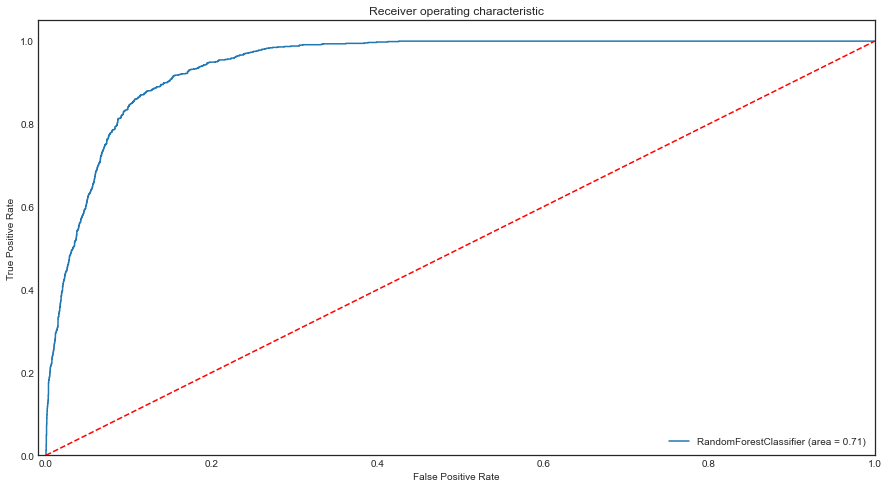

<Figure size 1080x576 with 0 Axes>

In [80]:
lr_roc_auc1 = roc_auc_score(y1_test, rfc.predict(X1_test))
fpr1, tpr1, thresholds1 = roc_curve(y1_test,rfc.predict_proba(X1_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='RandomForestClassifier (area = %0.2f)' % lr_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.savefig('ROC Curve')

### From ROC curve we can say that Random Forest Classifier gives the best Result

# Thank You